In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Python\projects\undata-barbsjean\data\gdp_percapita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


## Finding how many rows and columns are in the dataframe

In [4]:
gdp_df.shape

(7662, 4)

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### As you can see, we have 7662 rows with 4 columns. There is 3 different data types represented: object, interger, and float.

## Next, we need to clean up the dataframe. I will drop the last column and rename the remaining columns to make it cleaner.

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


## Next we will find the countries that have data for all the years in the dataframe and the countries that are missing years of data.

In [9]:
gdp_df['Year'].nunique() # number of unique years

33

In [10]:
gdp_df['Year'].sort_values().unique().tolist() # listing the unique years in chronological order

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [11]:
gdp_df['Country'] # grabs all the countries in the Country column

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7657       Zimbabwe
7658       Zimbabwe
7659       Zimbabwe
7660       Zimbabwe
7661       Zimbabwe
Name: Country, Length: 7662, dtype: object

In [12]:
gdp_df['Country'].value_counts().reset_index() # gives us the unqiue years per Country

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [13]:
gdp_df_all_years = gdp_df['Country'].value_counts().reset_index().rename(
    columns = {'Country':'Country',
              'count':'count'})   # for some reason, my dataframe was not instantly recongizing that I already had a "count"
                                  # column, so I had to run this to "rename" the columns so I could continue.

In [14]:
gdp_df_all_years # making sure it ran correctly

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [15]:
gdp_df_all_years[gdp_df_all_years['count']==33]

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
197,Finland,33
198,Europe & Central Asia (excluding high income),33
199,Ghana,33
200,Euro area,33


### We have 202 countries whose data we have for all 33 years.

In [16]:
gdp_df_missing_years = gdp_df['Country'].value_counts().reset_index().rename(
    columns = {'Country':'Country',
              'count':'count'}) 

In [17]:
gdp_df_missing_years # making sure it ran correctly

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [18]:
gdp_df_missing_years[gdp_df_missing_years['count']<33]

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


In [19]:
gdp_df_missing_years[gdp_df_missing_years['count']<33].count()

Country    40
count      40
dtype: int64

### We have 40 countries whose data is represented for less than 33 years.

### These countries may have not had data-collecting capabilites or they may have entered data too late causing their data to be missed in the dataset. There are many speculations we could pull from this analysis.

## Next, we will explore the GDP  from the year 2020 while using different visualizations.

In [20]:
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]

In [21]:
gdp_df_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


### *Histogram*

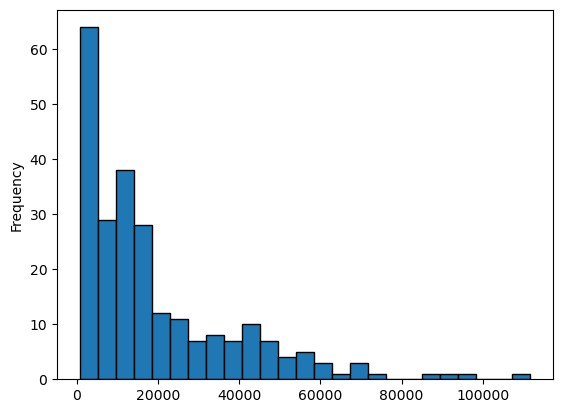

In [22]:
gdp_df_2020['GDP_Per_Capita'].plot(kind = 'hist',
                        edgecolor = 'black',
                        bins = 25);

### *Density Chart*

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


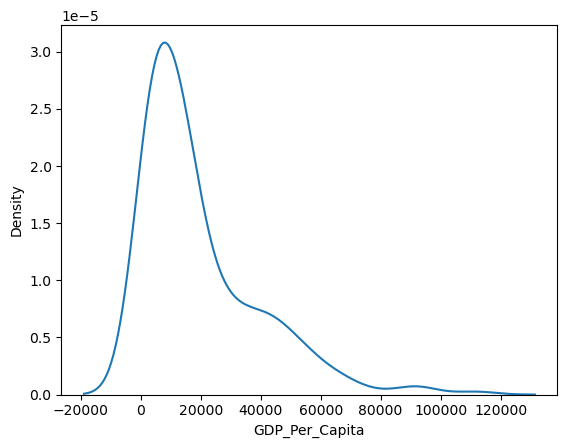

In [23]:
sns.kdeplot(data = gdp_df_2020, x = 'GDP_Per_Capita');

### *Box Plot*

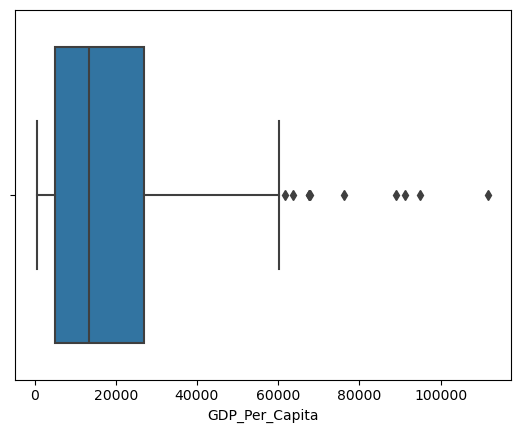

In [24]:
sns.boxplot(data = gdp_df_2020, x = 'GDP_Per_Capita');

### *Violin Plot*

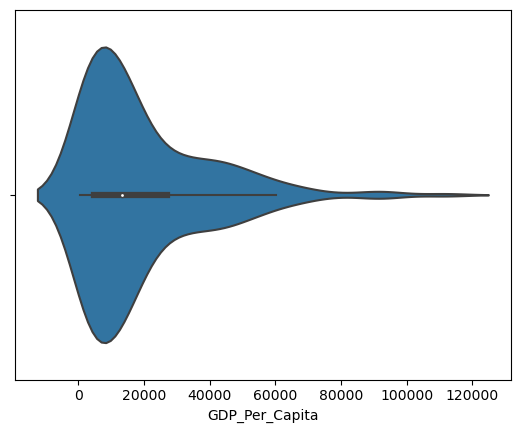

In [25]:
sns.violinplot(data = gdp_df_2020, x = 'GDP_Per_Capita');

## We were curious about the median GDP per capita in 2020.

In [26]:
gdp_df_2020["GDP_Per_Capita"].median()

13357.997573370474

## Next, we wanted to compare GDP per Capita for the following years: 1990, 2000, 2010, and 2020. We will do this by creating some more visualizations.

In [27]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [28]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


### *Box Plot*

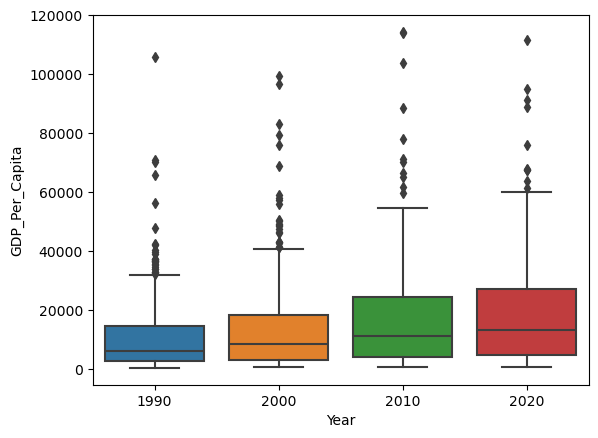

In [29]:
sns.boxplot(data = gdp_decades,
           x = 'Year',
           y = 'GDP_Per_Capita');

### *Bar Plot*

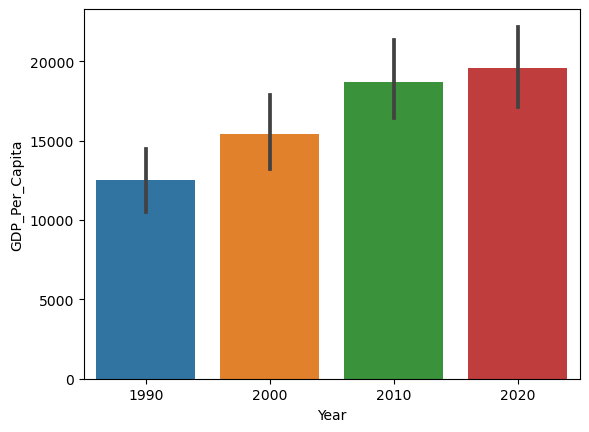

In [30]:
sns.barplot(data = gdp_decades,
           x = 'Year',
           y = 'GDP_Per_Capita');

### *Scatter Plot*

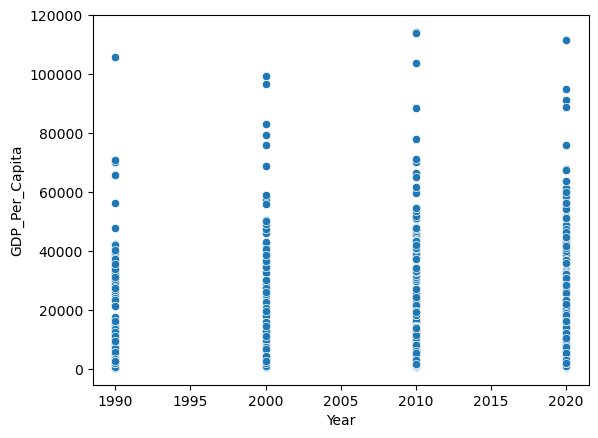

In [31]:
sns.scatterplot(data = gdp_decades,
           x = 'Year',
           y = 'GDP_Per_Capita');

### *Scatter Plot w/ TrendLine*

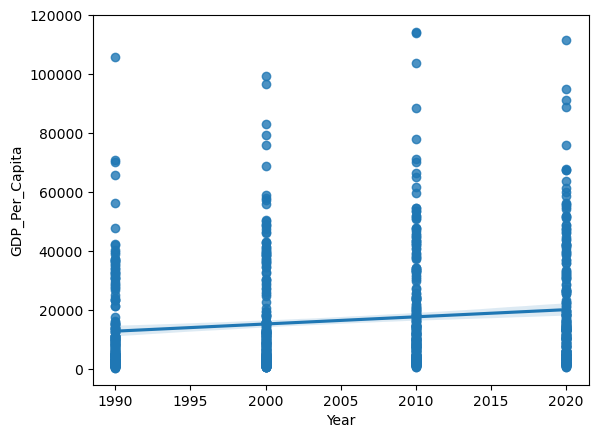

In [32]:
sns.regplot(data = gdp_decades,
           x = 'Year',
           y = 'GDP_Per_Capita');

### After doing a few different visualizations, it seems that for this filtered data of the 4 years is best represented with either the box plot of the bar plot. The scatter plots are very ambigous as far as what's being shown. 

## Next, we looked at countries that had a GDP per Capita greated than $100,000.

In [33]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In [34]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year').count()

Country           45
Year              45
GDP_Per_Capita    45
dtype: int64

### There were 45 countries that had GDP per Capita greater than $100,000 with United Arab Emirates being the first in 1990.

## Next, we circled back around to 2020 and wanted to know which country had the highest GDP per Capita in that year.  

In [35]:
gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita') # this helps us quickly find the country with the highest GDP per
                                                           # in 2020.

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


### Now I am going to dig deeper into the main dataframe and extract all of the data for Luxembourg for all years.

In [36]:
top_country_2020 = gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')['Country'].tolist()[0]

In [37]:
top_country_2020

'Luxembourg'

In [38]:
gdp_df[gdp_df['Country']==top_country_2020]

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<Axes: xlabel='Year'>

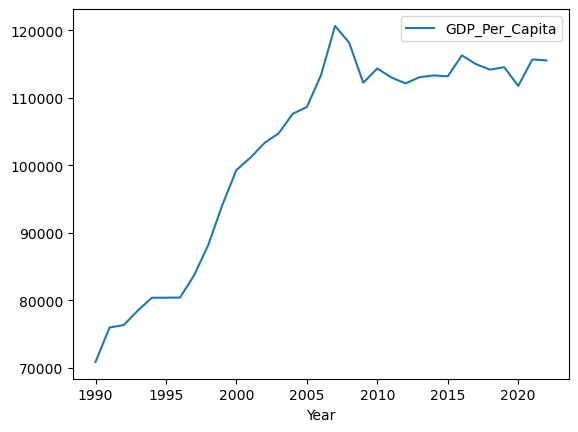

In [39]:
gdp_df[gdp_df['Country']==top_country_2020].plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')

### As you can see, there was a steady increase of GDP Per Capita through the years with a peak around 2007-2008. It dipped following that spike and has never spiked that high again, at least in our dataset.

## Next we are going to go in the opposite direction and find the country with the *lowest* GDP_Per_Capita for 2020.

In [40]:
gdp_df[gdp_df['Year']==2020].nsmallest(1, 'GDP_Per_Capita') 

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


### Now I am going to dig deeper into the main dataframe and extract all of the data for Burundi for all years.

In [41]:
bottom_country_2020 = gdp_df[gdp_df['Year']==2020].nsmallest(1, 'GDP_Per_Capita')['Country'].tolist()[0]

In [42]:
bottom_country_2020

'Burundi'

In [43]:
gdp_df[gdp_df['Country']==bottom_country_2020]

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


<Axes: xlabel='Year'>

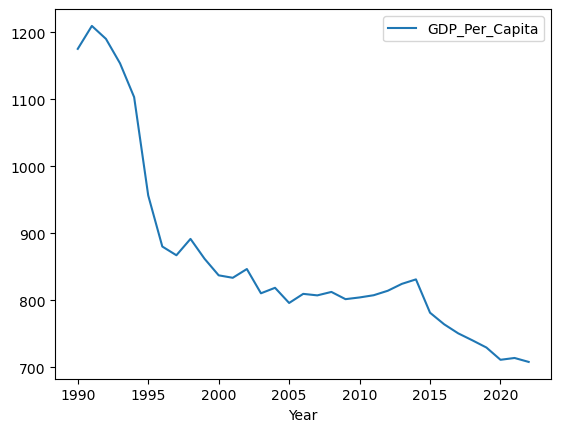

In [44]:
gdp_df[gdp_df['Country']==bottom_country_2020].plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')

### As you can see, Burundi's highest GDP_Per_Capita year was 1991 with a significant drop until 1997 where it spiked briefly then continued to decline.

### As an extra step, I wanted to analyze the years 2020 and 1990 to compare the GDP Per Capita per country.

In [45]:
gdp_comparsion_1990_2020 = pd.merge(
    left = gdp_df[gdp_df['Year']==1990],
    right = gdp_df[gdp_df['Year']==2020],
    on = 'Country',
    suffixes = ['_1990', '_2020'])

In [46]:
gdp_comparsion_1990_2020[gdp_comparsion_1990_2020['GDP_Per_Capita_1990'] > gdp_comparsion_1990_2020['GDP_Per_Capita_2020']]

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


## Next, we read in a new dataset titled Internet Use to compare with our existing dataframe.

In [47]:
internet_df = pd.read_csv('../undata-barbsjean/data/internet_use.csv',
                          on_bad_lines='skip',
                          nrows = 4495)

In [48]:
internet_df

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
0,Afghanistan,2014,6.390000,NaN,NaN,NaN
1,Afghanistan,2013,5.900000,NaN,NaN,NaN
2,Afghanistan,2012,5.454545,NaN,NaN,NaN
3,Afghanistan,2011,5.000000,NaN,NaN,NaN
4,Afghanistan,2010,4.000000,NaN,NaN,NaN
...,...,...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN,NaN,NaN
4491,Zimbabwe,1996,0.016790,NaN,NaN,NaN
4492,Zimbabwe,1995,0.007684,NaN,NaN,NaN
4493,Zimbabwe,1994,0.001739,NaN,NaN,NaN


In [49]:
internet_df.shape

(4495, 6)

In [50]:
print( type('Country or Area') )
print( type('Year') )
print( type('Value') )
print( type('Value Footnotes') )

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


#### Cleaning it up a little...

In [51]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df = internet_df.drop(columns = 'Unnamed: 4')
internet_df = internet_df.drop(columns = 'Unnamed: 5')

internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [52]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [53]:
internet_df.shape

(4495, 3)

In [54]:
internet_df.groupby('Year')['Country'].count().sort_index() # seeing how many countries are represented for each year

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64

## Here we are trying to find the first year where the percentage for internet users wasn't zero.

In [55]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year') # looks to be 1990!

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


## Next we are trying to find the difference of users for the years 2000 and 2014.

In [56]:
internet_use_comparsion_2000_2014 = pd.merge(
    left = internet_df[internet_df['Year']==2000],
    right = internet_df[internet_df['Year']==2014],
    on = 'Country',
    suffixes = ['_2000', '_2014'])

In [57]:
internet_use_comparsion_2000_2014 # seeing it in its own dataframe

,Country,Year_2000,Internet_Users_Pct_2000,Year_2014,Internet_Users_Pct_2014
0,Albania,2000,0.114097,2014,60.10
1,Algeria,2000,0.491706,2014,18.09
2,Andorra,2000,10.538836,2014,95.90
3,Angola,2000,0.105046,2014,21.26
4,Antigua and Barbuda,2000,6.482226,2014,64.00
...,...,...,...,...,...
188,Viet Nam,2000,0.254248,2014,48.31
189,Virgin Islands (U.S.),2000,13.815081,2014,50.07
190,Yemen,2000,0.082500,2014,22.55
191,Zambia,2000,0.191072,2014,17.34


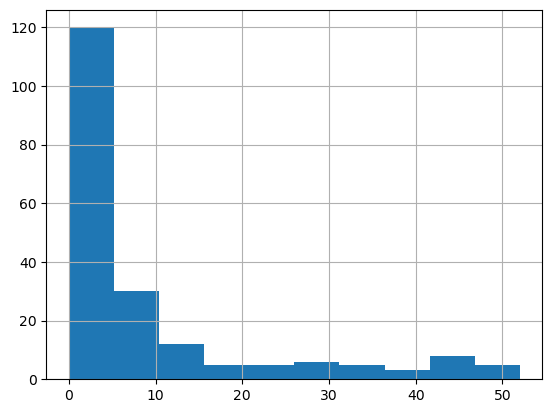

In [58]:
internet_df[internet_df['Year']==2000]['Internet_Users_Pct'].hist();

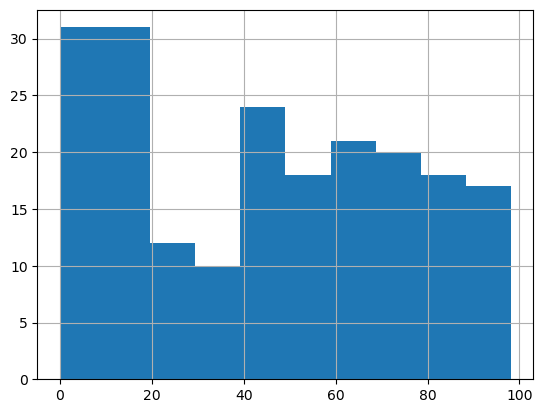

In [59]:
internet_df[internet_df['Year']==2014]['Internet_Users_Pct'].hist();

## Continuing on with 2014, let's look at the percentage of internet users below 5%.

In [60]:
internet_df[(internet_df['Year']==2014) & (internet_df['Internet_Users_Pct'] < 5)]

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


## Next we are going to merge both of our dataframes into one! 

In [61]:
gdp_and_internet_use = pd.merge(
    left = gdp_df,
    right = internet_df,
    how = 'outer')

In [62]:
gdp_and_internet_use.shape

(8736, 4)

### Going to clean it up a little bit...

In [63]:
# gdp_and_internet_use = gdp_and_internet_use.drop(['Value Footnotes'])

In [70]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


## Sticking with 2014, below is showing the 3 countries with the highest internet user percentage in that year.

In [75]:
highest_int_per_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct')

In [76]:
highest_int_per_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7896,Dem. People's Rep. of Korea,2014,NaN,0.00
7954,Eritrea,2014,NaN,0.99
6982,Timor-Leste,2014,3197.500120,1.14
979,Burundi,2014,831.294839,1.38
6279,Somalia,2014,925.577067,1.63
...,...,...,...,...
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7179,Tuvalu,2014,3521.328676,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


#### going to narrow it down even more...

In [77]:
highest_int_per_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct', 
                                                                                ascending = False)['Country'].tolist()[:3]

In [81]:
highest_int_per_2014 # this is going to plainly give us the 3 countries we are looking for

['Iceland', 'Bermuda', 'Norway']

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

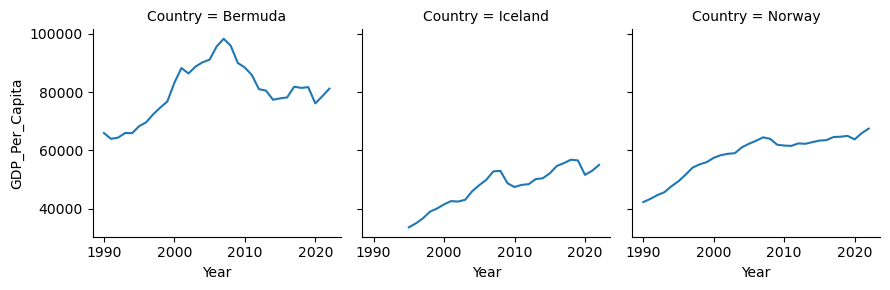

In [82]:
g = sns.FacetGrid(data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(highest_int_per_2014)],
                  col = 'Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita');

## We are still going to pick on 2014! Now we will filter our merged dataframe to just 2014.

In [84]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


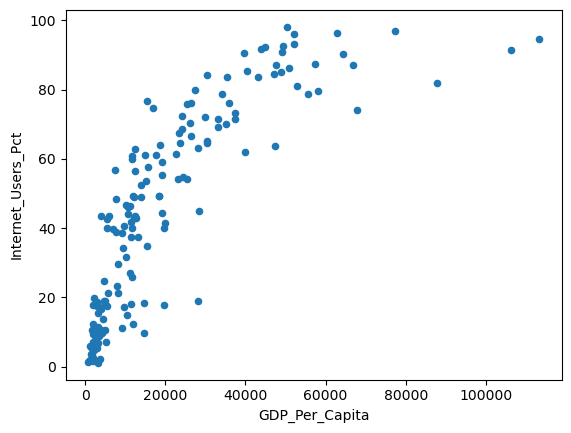

In [88]:
year = 2014
gdp_and_internet_use[gdp_and_internet_use['Year'] == year].plot(kind = 'scatter',
                                                                x = 'GDP_Per_Capita',
                                                                y = 'Internet_Users_Pct');

### What this graph is showing is the higher the GDP per Capita, the higher the percentage of internet users! 

## Lastly, we divided the countries from the 2014 table into 3 categories based on their GDP.

In [89]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],
                                                q = 3, labels = ['Low', 'Medium', 'High']);

C:\Users\Barbie\AppData\Local\Temp\ipykernel_12280\2747426503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],


In [90]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\Barbie\AppData\Local\Temp\ipykernel_12280\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64